In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load Excel file
df = pd.read_excel("Lufthansa_Flight_Data.xlsx")

In [3]:
# Step 3: Preview the dataset
print(df.head())
print(df.info())

  Flight Number Origin  Destination Departure Time Arrival Time  \
0        LH5471     FRA         ZRH       17:00:00     06:00:00   
1        LH6472     MUC         AMS       14:15:00     17:15:00   
2        LH8699     BER         CDG       21:15:00     13:00:00   
3        LH9273     FRA         LHR       19:30:00     17:00:00   
4        LH6971     HAM         MAD       11:15:00     11:45:00   

   Delay Minutes Aircraft Type  Cabin Crew Rating  Onboard Service Score  \
0              0          A319                3.8                    4.7   
1             10          A320                4.9                    3.8   
2              0       A320neo                4.2                    4.1   
3             10          A319                4.5                    3.5   
4              5       A321neo                4.1                    3.4   

   Ticket Price (€)  Passenger Satisfaction (1-10)  Complaints Passenger Class  
0               118                              9         

In [4]:
# Step 4: Basic statistics
print(df.describe())

       Delay Minutes  Cabin Crew Rating  Onboard Service Score  \
count       30.00000          30.000000              30.000000   
mean         9.00000           4.233333               4.033333   
std         14.22722           0.388040               0.549817   
min          0.00000           3.500000               3.100000   
25%          0.00000           3.925000               3.525000   
50%          5.00000           4.200000               4.050000   
75%         10.00000           4.500000               4.500000   
max         60.00000           4.900000               4.900000   

       Ticket Price (€)  Passenger Satisfaction (1-10)  Complaints  
count         30.000000                      30.000000   30.000000  
mean         192.466667                       7.966667    0.500000  
std           57.387812                       1.473521    0.861034  
min          118.000000                       4.000000    0.000000  
25%          156.250000                       7.000000    0.

In [5]:
# Step 5: Check for missing values
print(df.isnull().sum())

Flight Number                    0
Origin                           0
Destination                      0
Departure Time                   0
Arrival Time                     0
Delay Minutes                    0
Aircraft Type                    0
Cabin Crew Rating                0
Onboard Service Score            0
Ticket Price (€)                 0
Passenger Satisfaction (1-10)    0
Complaints                       0
Passenger Class                  0
dtype: int64


C:\Users\Aayush\AppData\Local\Temp\ipykernel_28072\330775475.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Destination", y="Delay Minutes", data=df, estimator='mean', ci=None)


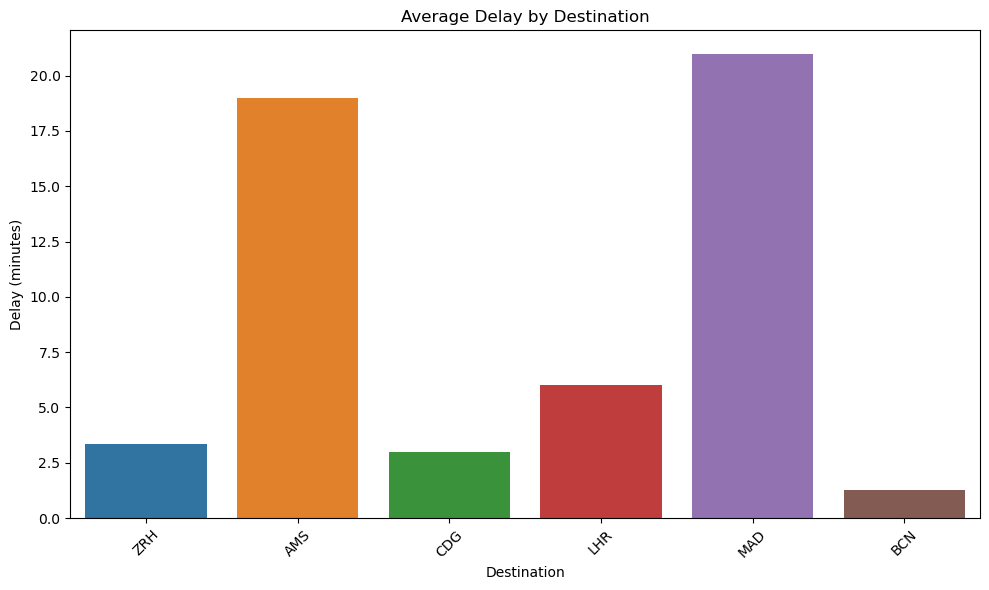

In [7]:
# Step 6: Visualizations

# 1. Bar chart: Average delay by destination
plt.figure(figsize=(10,6))
sns.barplot(x="Destination", y="Delay Minutes", data=df, estimator='mean', ci=None)
plt.title("Average Delay by Destination")
plt.ylabel("Delay (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

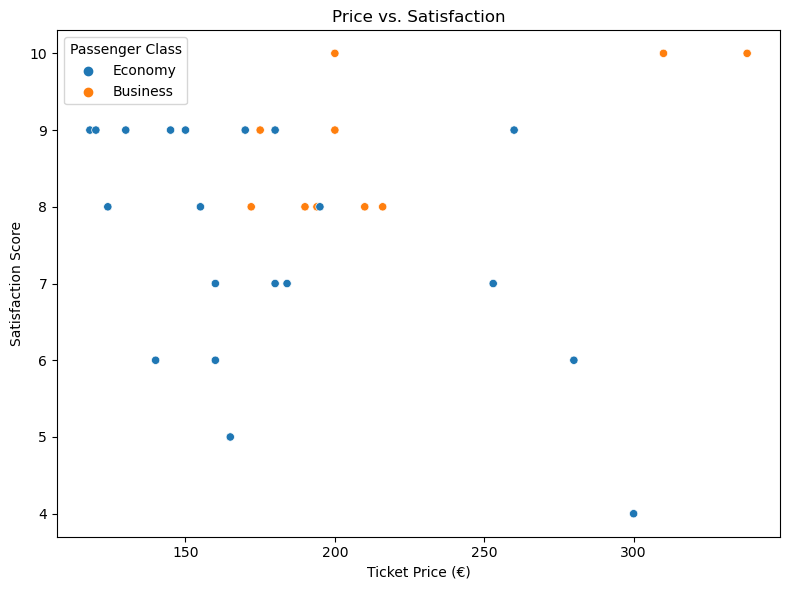

In [10]:
# 2. Scatter: Ticket Price vs. Satisfaction
plt.figure(figsize=(8,6))
sns.scatterplot(x="Ticket Price (€)", y="Passenger Satisfaction (1-10)", hue="Passenger Class", data=df)
plt.title("Price vs. Satisfaction")
plt.xlabel("Ticket Price (€)")
plt.ylabel("Satisfaction Score")
plt.tight_layout()
plt.show()

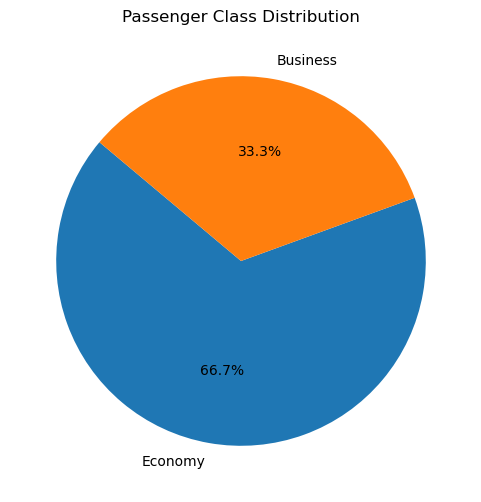

In [12]:
# 3. Pie Chart: Passenger class distribution
class_counts = df['Passenger Class'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Passenger Class Distribution")
plt.show()

In [14]:
# Convert 'PassengerSatisfaction (1–10)' to categorical
def satisfaction_category(score):
    if score <= 5:
        return "Low"
    elif score <= 7:
        return "Medium"
    else:
        return "High"

df['SatisfactionCategory'] = df['Passenger Satisfaction (1-10)'].apply(satisfaction_category)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
# Select features
features = ['Delay Minutes', 'Ticket Price (€)', 'Complaints', 'Cabin Crew Rating', 'Onboard Service Score']
X = df[features]

In [17]:
# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['SatisfactionCategory'])  # 0 = High, 1 = Low, 2 = Medium

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predict
y_pred = model.predict(X_test)

In [22]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


Confusion Matrix:
 [[6]]


In [23]:
# Feature importance
import matplotlib.pyplot as plt

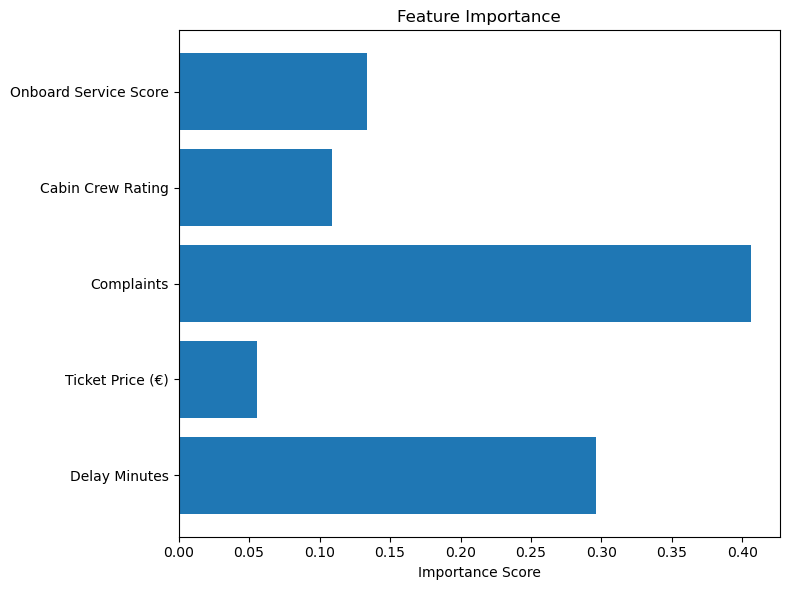

In [24]:
importances = model.feature_importances_
plt.figure(figsize=(8,6))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()